# DelayedFlights Analysis

### Machine Learning

#### Import the libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('DelayedFlights.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
np.random.seed(0)

In [3]:
df.sample(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
595091,1860421,2008,4,24,4,2002.0,1940,2104.0,2055,WN,...,3.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
699277,2286689,2008,4,24,4,627.0,620,1147.0,1150,AA,...,18.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
513280,1606537,2008,3,6,4,1933.0,1911,2118.0,2105,NW,...,9.0,20.0,0,N,0,NaN,NaN,NaN,NaN,NaN
555111,1738057,2008,3,24,1,1926.0,1910,2201.0,2150,B6,...,6.0,14.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1269142,4241417,2008,8,5,2,1034.0,1015,1329.0,1310,WN,...,6.0,8.0,0,N,0,0.0,0.0,0.0,0.0,19.0


In [4]:
df.head(18)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706.0,700,916.0,915,WN,...,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,...,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


### Drop the Unnamed column from the dataframe

In [5]:
df.drop(df.columns[df.columns.str.contains('unnamed', case = False)], axis = 1, inplace = True)

In [6]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936757,2008,12,13,6,1110.0,1103,1413.0,1418,DL,1641,...,8.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN


### Ckeck the shape of the dataset

In [8]:
df.shape

(1936758, 29)

In [9]:
df.index

RangeIndex(start=0, stop=1936758, step=1)

In [10]:
print(X)

[[0 2008 1 ... nan nan nan]
 [1 2008 1 ... nan nan nan]
 [2 2008 1 ... nan nan nan]
 ...
 [7009718 2008 12 ... 0.0 19.0 0.0]
 [7009726 2008 12 ... nan nan nan]
 [7009727 2008 12 ... nan nan nan]]


In [11]:
print(y)

[nan nan nan ... 79. nan nan]


## Find the name of the columns of the dataframe and index

In [12]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

## Basic Insight of Dataset

###### Data Types

In [13]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

#### Info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

### Describe

In [15]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [16]:
df.describe(include = 'all')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1936758,1.936758e+06,...,1.929648e+06,1.936303e+06,1.936758e+06,1936758,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,...,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377602,NaN,...,NaN,NaN,NaN,1936125,NaN,NaN,NaN,NaN,NaN,NaN
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,NaN,2.184263e+03,...,6.812975e+00,1.823220e+01,3.268348e-04,NaN,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,NaN,1.944702e+03,...,5.273595e+00,1.433853e+01,1.807562e-02,NaN,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,NaN,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,NaN,6.100000e+02,...,4.000000e+00,1.000000e+01,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,NaN,1.543000e+03,...,6.000000e+00,1.400000e+01,0.000000e+00,NaN,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,NaN,3.422000e+03,...,8.000000e+00,2.100000e+01,0.000000e+00,NaN,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,1936758.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,1936758.0,6.111106,3.482546,1.0,3.0,6.0,9.0,12.0
DayofMonth,1936758.0,15.753470,8.776272,1.0,8.0,16.0,23.0,31.0
DayOfWeek,1936758.0,3.984827,1.995966,1.0,2.0,4.0,6.0,7.0
DepTime,1936758.0,1518.534117,450.485255,1.0,1203.0,1545.0,1900.0,2400.0
CRSDepTime,1936758.0,1467.472644,424.766800,0.0,1135.0,1510.0,1815.0,2359.0
ArrTime,1929648.0,1610.140629,548.178143,1.0,1316.0,1715.0,2030.0,2400.0
CRSArrTime,1936758.0,1634.224641,464.634712,0.0,1325.0,1705.0,2014.0,2400.0
FlightNum,1936758.0,2184.263236,1944.702250,1.0,610.0,1543.0,3422.0,9742.0
ActualElapsedTime,1928371.0,133.305863,72.060069,14.0,80.0,116.0,165.0,1114.0


### Handling Missing Data

In [18]:
missing_data = df.isnull()
missing_data.head(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Get the number of missing_data point per column

In [19]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Year
False    1936758
Name: Year, dtype: int64

Month
False    1936758
Name: Month, dtype: int64

DayofMonth
False    1936758
Name: DayofMonth, dtype: int64

DayOfWeek
False    1936758
Name: DayOfWeek, dtype: int64

DepTime
False    1936758
Name: DepTime, dtype: int64

CRSDepTime
False    1936758
Name: CRSDepTime, dtype: int64

ArrTime
False    1929648
True        7110
Name: ArrTime, dtype: int64

CRSArrTime
False    1936758
Name: CRSArrTime, dtype: int64

UniqueCarrier
False    1936758
Name: UniqueCarrier, dtype: int64

FlightNum
False    1936758
Name: FlightNum, dtype: int64

TailNum
False    1936753
True           5
Name: TailNum, dtype: int64

ActualElapsedTime
False    1928371
True        8387
Name: ActualElapsedTime, dtype: int64

CRSElapsedTime
False    1936560
True         198
Name: CRSElapsedTime, dtype: int64

AirTime
False    1928371
True        8387
Name: AirTime, dtype: int64

ArrDelay
False    1928371
True        8387
Name: ArrDelay, dtype: int64

DepDelay
False    193675

### How many missing_data do we have

In [20]:
missing_values_count = df.isnull().sum()
missing_values_count

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [21]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

6.207296437904352

**About 6.something % of the dataset has missing values**

## Drop missin_values


## Remove all the columns with at least one missing value

In [22]:
columns_with_na_dropped = df.dropna(axis=1)
columns_with_na_dropped.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,Diverted
0,2008,1,3,4,2003.0,1955,2225,WN,335,8.0,IAD,TPA,810,0,N,0
1,2008,1,3,4,754.0,735,1000,WN,3231,19.0,IAD,TPA,810,0,N,0
2,2008,1,3,4,628.0,620,750,WN,448,8.0,IND,BWI,515,0,N,0
3,2008,1,3,4,1829.0,1755,1925,WN,3920,34.0,IND,BWI,515,0,N,0
4,2008,1,3,4,1940.0,1915,2110,WN,378,25.0,IND,JAX,688,0,N,0


### Just to know how many data we have lost

In [23]:
print('Column in original dataset: %d \n' % df.shape[1])
print("Column with na's dropped: %d" % columns_with_na_dropped.shape[1])

Column in original dataset: 29 

Column with na's dropped: 16


## Calculate the Average of the column

In [24]:
avg_ArrTime = df['ArrTime'].astype('float').mean(axis=0)
print("Average of ArrTime:",avg_ArrTime )

Average of ArrTime: 1610.140628757162


In [25]:
df['ArrTime'].replace(np.nan,avg_ArrTime , inplace = True)

In [26]:
avg_ActualElapsedTime = df["ActualElapsedTime"].astype("float").mean(axis=0)
print("ActualElapsedTime:", avg_ActualElapsedTime)

ActualElapsedTime: 133.30586334268665


In [27]:
df["ActualElapsedTime"].replace(np.nan, avg_ActualElapsedTime, inplace=True)

In [28]:
avg_CRSElapsedTime = df["CRSElapsedTime"].astype("float").mean(axis=0)
print("Average of CRSElapsedTime:", avg_CRSElapsedTime )

Average of CRSElapsedTime: 134.3027440409799


In [29]:
df["CRSElapsedTime"].replace(np.nan, avg_CRSElapsedTime, inplace = True)

In [30]:
avg_AirTime = df["AirTime"].astype("float").mean(axis=0)
print("Average of AirTime:", avg_AirTime)

Average of AirTime: 108.27714739539228


In [31]:
df["AirTime"].replace(np.nan, avg_AirTime, inplace=True)

In [32]:
avg_ArrDelay = df["ArrDelay"].astype("float").mean(axis=0)
print("Average of ArrDelay:",avg_ArrDelay)

Average of ArrDelay: 42.19988477321014


In [33]:
df["ArrDelay"].replace(np.nan, avg_ArrDelay, inplace = True)

In [34]:
avg_TaxiIn = df["TaxiIn"].astype("float").mean(axis=0)
print("Average of TaxiIn:",avg_TaxiIn)

Average of TaxiIn: 6.812975216205236


In [35]:
df["TaxiIn"].replace(np.nan, avg_TaxiIn, inplace = True)

In [36]:
avg_TaxiOut = df["TaxiOut"].astype("float").mean(axis=0)
print("Average of TaxiOut:", avg_TaxiOut)

Average of TaxiOut: 18.232202811233574


In [37]:
df["TaxiOut"].replace(np.nan, avg_TaxiOut, inplace=True)

In [38]:
avg_CarrierDelay = df["CarrierDelay"].astype("float").mean(axis=0)
print("Average of CarrierDelay", avg_CarrierDelay)

Average of CarrierDelay 19.179398920069772


In [39]:
df["CarrierDelay"].replace(np.nan, avg_CarrierDelay, inplace = True)

In [40]:
avg_WeatherDelay = df["WeatherDelay"].astype("float").mean(axis=0)
print("Average of WeatherDelay:", avg_WeatherDelay)

Average of WeatherDelay: 3.7035706956700185


In [41]:
df["WeatherDelay"].replace(np.nan, avg_WeatherDelay, inplace=True)

In [42]:
avg_NASDelay = df["NASDelay"].astype("float").mean(axis=0)
print("Average of NASDelay:", avg_NASDelay)

Average of NASDelay: 15.021635478657911


In [43]:
df["NASDelay"].replace(np.nan, avg_NASDelay, inplace=True)

In [44]:
avg_SecurityDelay = df["SecurityDelay"].astype("float").mean(axis=0)
print("Average of SecurityDelay:", avg_SecurityDelay)

Average of SecurityDelay: 0.09013713959573158


In [45]:
df["SecurityDelay"].replace(np.nan, avg_SecurityDelay, inplace = True)

In [46]:
avg_LateAircraftDelay = df["LateAircraftDelay"].astype("float").mean(axis=0)
print("Average of LateAircraftDelay:", avg_LateAircraftDelay)

Average of LateAircraftDelay: 25.296466178432176


In [47]:
df["LateAircraftDelay"].replace(np.nan, avg_LateAircraftDelay, inplace=True)

In [48]:
df.head(19)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.000000,0.000000,0.000000,0.000000,32.000000
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
5,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,N,0,10.000000,0.000000,0.000000,0.000000,47.000000
6,2008,1,3,4,706.0,700,916.0,915,WN,100,...,5.0,19.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
7,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,...,6.0,8.0,0,N,0,8.000000,0.000000,0.000000,0.000000,72.000000
8,2008,1,3,4,1029.0,1020,1021.0,1010,WN,2272,...,6.0,9.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
9,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,...,7.0,8.0,0,N,0,3.000000,0.000000,0.000000,0.000000,12.000000


## Correct Data Format

In [49]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [50]:
df["UniqueCarrier"].value_counts()

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64

In [51]:
df["TailNum"].value_counts()

N325SW    965
N676SW    951
N658SW    945
N313SW    937
N308SA    936
         ... 
N193UA      1
N171DN      1
N104UA      1
N27015      1
N78008      1
Name: TailNum, Length: 5366, dtype: int64

In [52]:
df["Origin"]

0          IAD
1          IAD
2          IND
3          IND
4          IND
          ... 
1936753    MSP
1936754    RIC
1936755    ATL
1936756    IAD
1936757    SAT
Name: Origin, Length: 1936758, dtype: object

In [53]:
df["Dest"].value_counts()

ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
        ...  
INL         9
PIR         3
CYS         1
OGD         1
TUP         1
Name: Dest, Length: 304, dtype: int64

In [54]:
df["CancellationCode"].value_counts()

N    1936125
B        307
A        246
C         80
Name: CancellationCode, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018225195848>,
      dtype=object)

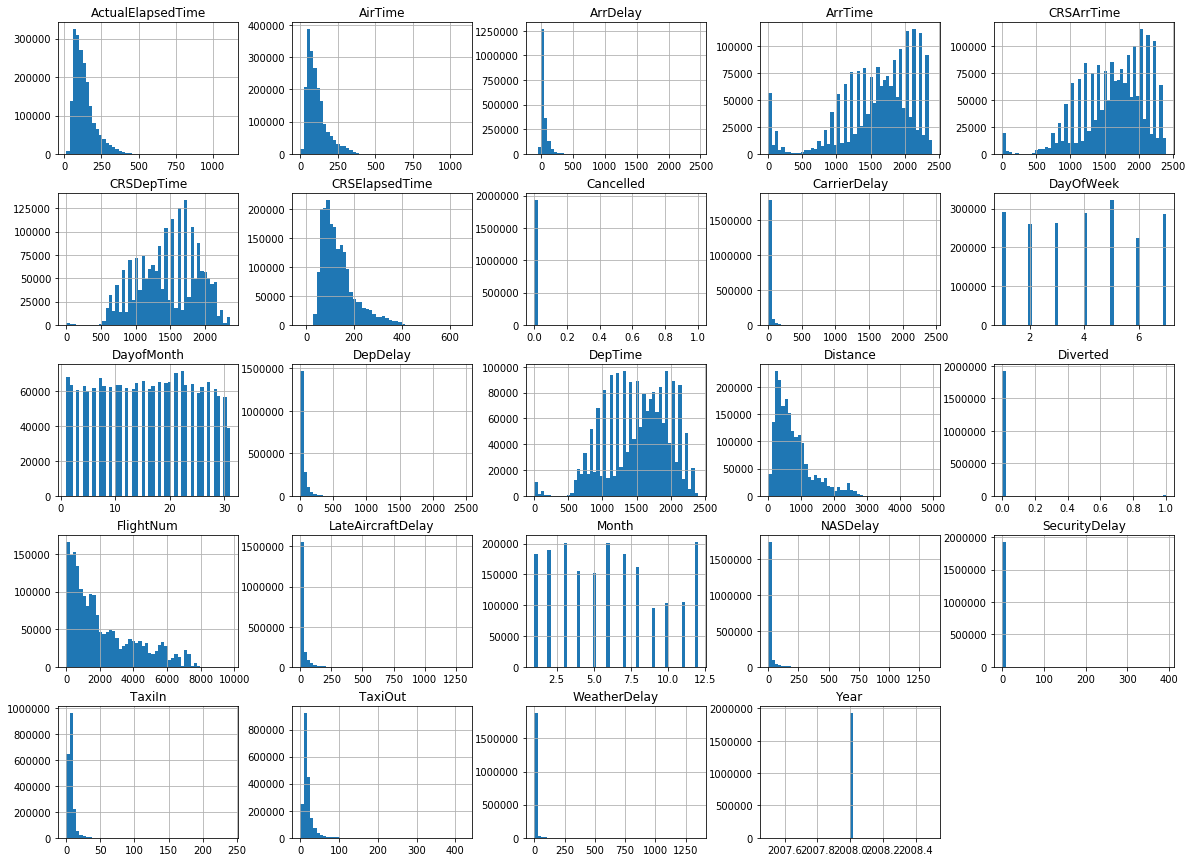

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as plt
df.hist(bins=50, figsize=(20,15))

## Binning

In [56]:
df["UniqueCarrier"] = df["UniqueCarrier"].astype =("int")

Text(0.5, 1.0, 'UniqueCarrier bins')

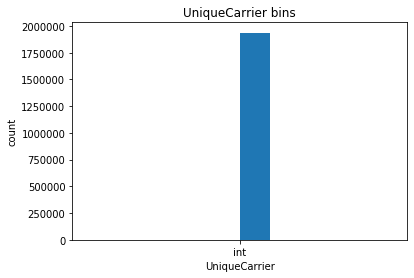

In [57]:
import matplotlib as plt
plt.pyplot.hist(df["UniqueCarrier"])
plt.pyplot.xlabel("UniqueCarrier")
plt.pyplot.ylabel("count")
plt.pyplot.title("UniqueCarrier bins")                  

Text(0.5, 1.0, 'Dest bins')

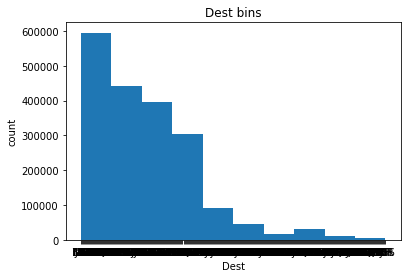

In [58]:
import matplotlib as plt
plt.pyplot.hist(df["Dest"])
plt.pyplot.xlabel("Dest")
plt.pyplot.ylabel("count")
plt.pyplot.title("Dest bins")             

Text(0.5, 1.0, 'CancellationCode bins')

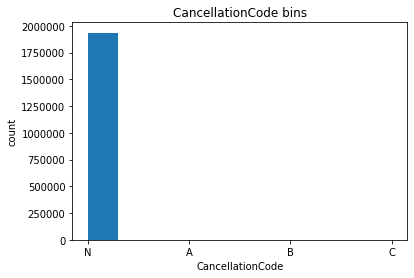

In [59]:
plt.pyplot.hist(df["CancellationCode"])
plt.pyplot.xlabel("CancellationCode")
plt.pyplot.ylabel("count")
plt.pyplot.title("CancellationCode bins")

Text(0.5, 1.0, 'Origin bins')

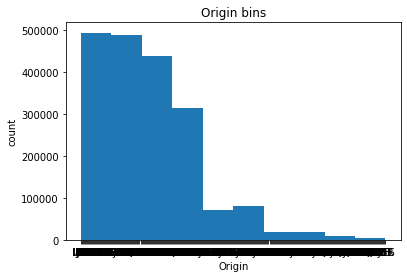

In [60]:
plt.pyplot.hist(df["Origin"])
plt.pyplot.xlabel("Origin")
plt.pyplot.ylabel("count")
plt.pyplot.title("Origin bins")

## Indicator Variable

In [61]:
dummy_variable_1 = pd.get_dummies(df["UniqueCarrier"])

In [62]:
dummy_variable_1.head()

,int
0,1
1,1
2,1
3,1
4,1


##### Change the column name for clarity

In [63]:
dummy_variable_1.rename(columns={"UniqueCarrier":"int"}, inplace = True)
dummy_variable_1.head()

,int
0,1
1,1
2,1
3,1
4,1


###### Let merg dataframe and dummy_variable_1

###### and drop original  UniqueCarrier from df

In [64]:
df = pd.concat([df, dummy_variable_1], axis = 1)


df.drop("UniqueCarrier", axis = 1, inplace=True)

In [65]:
dummy_variable_2 = pd.get_dummies(df["CancellationCode"])

In [66]:
dummy_variable_2.head()

,A,B,C,N
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [67]:
dummy_variable_2.rename(columns={"CancellationCode":"A", "CancellationCode":"B",
                                 "CancellationCode":"C", "CancellationCode":"N"}, inplace=True)

In [68]:
df = pd.concat([df, dummy_variable_2], axis = 1)

df.drop("CancellationCode", axis = 1, inplace = True )

In [69]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,TailNum,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,int,A,B,C,N
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,N712SW,...,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,0,1
1,2008,1,3,4,754.0,735,1002.0,1000,3231,N772SW,...,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,0,1
2,2008,1,3,4,628.0,620,804.0,750,448,N428WN,...,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,0,1
3,2008,1,3,4,1829.0,1755,1959.0,1925,3920,N464WN,...,2.000000,0.000000,0.000000,0.000000,32.000000,1,0,0,0,1
4,2008,1,3,4,1940.0,1915,2121.0,2110,378,N726SW,...,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,0,1


### Let drop the column "TailNum" from the dataframe

In [70]:
df.drop("TailNum", axis = 1, inplace = True)

In [71]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,int,A,B,C,N
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,128.0,...,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,0,1
1,2008,1,3,4,754.0,735,1002.0,1000,3231,128.0,...,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,0,1
2,2008,1,3,4,628.0,620,804.0,750,448,96.0,...,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,0,1
3,2008,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,...,2.000000,0.000000,0.000000,0.000000,32.000000,1,0,0,0,1
4,2008,1,3,4,1940.0,1915,2121.0,2110,378,101.0,...,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,0,1


In [72]:
final = df.drop("A", axis = 1, inplace = True)
final

In [73]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,int,B,C,N
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,128.0,...,0,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,1
1,2008,1,3,4,754.0,735,1002.0,1000,3231,128.0,...,0,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,1
2,2008,1,3,4,628.0,620,804.0,750,448,96.0,...,0,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,1
3,2008,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,...,0,2.000000,0.000000,0.000000,0.000000,32.000000,1,0,0,1
4,2008,1,3,4,1940.0,1915,2121.0,2110,378,101.0,...,0,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,1


### Analyzing Individual Features Patterns Using Visualization

## Continuous Numerical Variable

**We are going to use scatter plot to view it because they are "int64" or "float64"

**To understand the linear relationship we are using regplot**

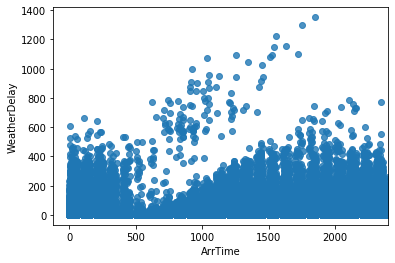

In [74]:
# ArrivalTime as potential predictor variable of WeatherDelay

sns.regplot(x = "ArrTime", y = "WeatherDelay", data = df)

In [75]:
df[["ArrTime", "WeatherDelay"]].corr()

,ArrTime,WeatherDelay
ArrTime,1.000000,-0.025575
WeatherDelay,-0.025575,1.000000


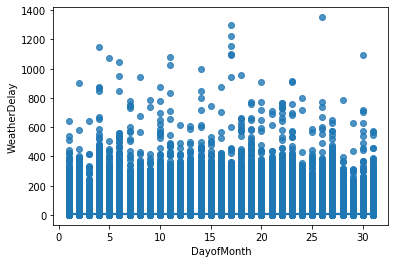

In [76]:
# DayofMonth as potential predictor of WeatherDelay
sns.regplot(x = "DayofMonth", y = "WeatherDelay", data = df)

In [77]:
df[["DayofMonth", "WeatherDelay"]].corr()

,DayofMonth,WeatherDelay
DayofMonth,1.000000,0.000737
WeatherDelay,0.000737,1.000000


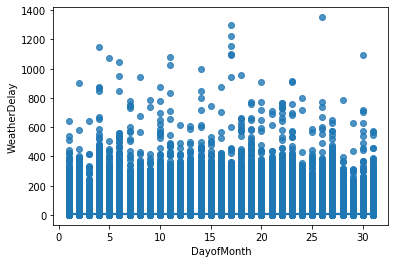

In [78]:
sns.regplot(x = "DayofMonth", y = "WeatherDelay", data = df)

In [79]:
df.corr()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,int,B,C,N
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,NaN,1.000000,0.059651,0.000088,-0.007809,-0.011367,1.012123e-03,0.001367,-0.000188,2.677223e-03,...,6.467161e-03,3.393325e-04,5.345911e-03,9.251546e-03,-2.479368e-03,4.005584e-03,NaN,2.041984e-02,1.015295e-02,-2.883651e-02
DayofMonth,NaN,0.059651,1.000000,0.017476,0.001014,0.001019,8.315616e-04,0.000758,-0.005912,-8.780270e-04,...,1.190288e-03,-7.612141e-04,7.368659e-04,4.538403e-03,-2.474913e-04,7.316979e-03,NaN,5.326013e-03,4.277018e-04,-4.670781e-03
DayOfWeek,NaN,0.000088,0.017476,1.000000,0.021924,0.027039,1.089324e-02,0.017750,-0.009769,3.065521e-03,...,-1.361487e-03,8.186765e-03,4.531432e-03,-5.312461e-03,3.738971e-03,7.083987e-03,NaN,9.176438e-04,-2.245432e-03,-2.296056e-05
DepTime,NaN,-0.007809,0.001014,0.021924,1.000000,0.881598,4.580528e-01,0.711513,-0.024786,-4.693274e-02,...,-4.632396e-03,-4.204757e-02,4.295641e-03,1.823626e-02,-1.236192e-02,1.371576e-01,NaN,3.588649e-03,4.631941e-04,-2.280372e-03
CRSDepTime,NaN,-0.011367,0.001019,0.027039,0.881598,1.000000,3.959745e-01,0.710303,-0.054808,-3.484595e-02,...,-9.096035e-03,-8.541723e-02,-7.431151e-03,-2.602259e-02,-1.357936e-02,1.334802e-01,NaN,2.641653e-03,-9.993628e-04,-2.305380e-05
ArrTime,NaN,0.001012,0.000832,0.010893,0.458053,0.395974,1.000000e+00,0.618245,-0.013638,-1.358573e-02,...,-2.928380e-03,-7.192918e-02,-2.557477e-02,2.774622e-02,-6.352825e-03,-3.250355e-02,NaN,-4.316063e-18,-5.106810e-18,1.376412e-17
CRSArrTime,NaN,0.001367,0.000758,0.017750,0.711513,0.710303,6.182445e-01,1.000000,-0.060006,3.313074e-02,...,9.065719e-04,-7.669054e-02,-4.013853e-03,7.359174e-03,-1.064682e-02,1.048530e-01,NaN,2.455603e-03,-1.215710e-03,-2.005906e-04
FlightNum,NaN,-0.000188,-0.005912,-0.009769,-0.024786,-0.054808,-1.363828e-02,-0.060006,1.000000,-3.215423e-01,...,-2.884725e-03,4.592785e-02,5.563565e-02,1.269943e-02,-2.315624e-03,-4.345123e-02,NaN,8.173901e-03,5.367630e-03,-9.147172e-03
ActualElapsedTime,NaN,0.002677,-0.000878,0.003066,-0.046933,-0.034846,-1.358573e-02,0.033131,-0.321542,1.000000e+00,...,3.709352e-16,8.038548e-03,3.281307e-03,1.429387e-01,4.615418e-03,-2.760090e-02,NaN,5.921485e-17,-9.920478e-17,-7.573339e-17


In [80]:
df["Year"].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1936753    False
1936754    False
1936755    False
1936756    False
1936757    False
Name: Year, Length: 1936758, dtype: bool

In [81]:
df["int"].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1936753    False
1936754    False
1936755    False
1936756    False
1936757    False
Name: int, Length: 1936758, dtype: bool

In [82]:
columns_with_na_dropped = df.dropna(axis = 1)
columns_with_na_dropped.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,int,B,C,N
0,2008,1,3,4,2003.0,1955,2211.0,2225,335,128.0,...,0,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,1
1,2008,1,3,4,754.0,735,1002.0,1000,3231,128.0,...,0,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,1
2,2008,1,3,4,628.0,620,804.0,750,448,96.0,...,0,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,1
3,2008,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,...,0,2.000000,0.000000,0.000000,0.000000,32.000000,1,0,0,1
4,2008,1,3,4,1940.0,1915,2121.0,2110,378,101.0,...,0,19.179399,3.703571,15.021635,0.090137,25.296466,1,0,0,1


In [83]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Year
False    1936758
Name: Year, dtype: int64

Month
False    1936758
Name: Month, dtype: int64

DayofMonth
False    1936758
Name: DayofMonth, dtype: int64

DayOfWeek
False    1936758
Name: DayOfWeek, dtype: int64

DepTime
False    1936758
Name: DepTime, dtype: int64

CRSDepTime
False    1936758
Name: CRSDepTime, dtype: int64

ArrTime
False    1929648
True        7110
Name: ArrTime, dtype: int64

CRSArrTime
False    1936758
Name: CRSArrTime, dtype: int64

UniqueCarrier
False    1936758
Name: UniqueCarrier, dtype: int64

FlightNum
False    1936758
Name: FlightNum, dtype: int64

TailNum
False    1936753
True           5
Name: TailNum, dtype: int64

ActualElapsedTime
False    1928371
True        8387
Name: ActualElapsedTime, dtype: int64

CRSElapsedTime
False    1936560
True         198
Name: CRSElapsedTime, dtype: int64

AirTime
False    1928371
True        8387
Name: AirTime, dtype: int64

ArrDelay
False    1928371
True        8387
Name: ArrDelay, dtype: int64

DepDelay
False    193675

In [84]:
missing_values_count = df.isnull().sum()
missing_values_count

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
int                  0
B                    0
C                    0
N                    0
dtype: int64

## Basic of Groupping

In [85]:
df["DayofMonth"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  2,  1],
      dtype=int64)

In [86]:
df_group_one = df[["DayofMonth", "ArrDelay", "WeatherDelay"]]

## We can now calculate average of weatherDelay of DayofMonth

In [87]:
df_group_one = df_group_one.groupby(["DayofMonth"], as_index=False).mean()
df_group_one

,DayofMonth,ArrDelay,WeatherDelay
0,1,42.256262,3.219047
1,2,41.093392,3.343715
2,3,38.529417,2.978989
3,4,48.967693,5.126461
4,5,39.163456,3.585092
5,6,43.274419,4.229133
6,7,41.181392,3.219813
7,8,46.136638,3.912053
8,9,39.978458,3.066186
9,10,46.406020,4.490367


## To make it easier to visualize we use pivot table

In [88]:
grouped_pivot = df_group_one.pivot(index = "DayofMonth", columns = "ArrDelay")
grouped_pivot

WeatherDelay                                                    \
ArrDelay      38.258436 38.479271 38.529417 38.962686 39.073674 39.163456   
DayofMonth                                                                  
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN  2.978989       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   
5                   NaN       NaN       NaN       NaN       NaN  3.585092   
6                   NaN       NaN       NaN       NaN       NaN       NaN   
7                   NaN       NaN       NaN       NaN       NaN       NaN   
8                   NaN       NaN       NaN       NaN       NaN       NaN   
9                   NaN       NaN       NaN       NaN       NaN       NaN   
10                  NaN       NaN       NaN       NaN       NaN       NaN   
11                  NaN       NaN       NaN       NaN       NaN       NaN   
12                  NaN       NaN       NaN       NaN       NaN       NaN   
13                  NaN       NaN       NaN       NaN       NaN       NaN   
14                  NaN       NaN       NaN       NaN       NaN       NaN   
15                  NaN       NaN       NaN       NaN       NaN       NaN   
16                  NaN       NaN       NaN       NaN       NaN       NaN   
17                  NaN   3.53075       NaN       NaN       NaN       NaN   
18                  NaN       NaN       NaN       NaN       NaN       NaN   
19                  NaN       NaN       NaN       NaN       NaN       NaN   
20                  NaN       NaN       NaN       NaN       NaN       NaN   
21                  NaN       NaN       NaN       NaN       NaN       NaN   
22                  NaN       NaN       NaN       NaN       NaN       NaN   
23                  NaN       NaN       NaN       NaN       NaN       NaN   
24                  NaN       NaN       NaN  2.973873       NaN       NaN   
25                  NaN       NaN       NaN       NaN       NaN       NaN   
26                  NaN       NaN       NaN       NaN       NaN       NaN   
27                  NaN       NaN       NaN       NaN       NaN       NaN   
28                  NaN       NaN       NaN       NaN  3.202483       NaN   
29             3.152017       NaN       NaN       NaN       NaN       NaN   
30                  NaN       NaN       NaN       NaN       NaN       NaN   
31                  NaN       NaN       NaN       NaN       NaN       NaN   

                                                    ...                      \
ArrDelay   39.241042 39.931129 39.978458 40.106628  ... 43.274419 43.310757   
DayofMonth                                          ...                       
1                NaN       NaN       NaN       NaN  ...       NaN       NaN   
2                NaN       NaN       NaN       NaN  ...       NaN       NaN   
3                NaN       NaN       NaN       NaN  ...       NaN       NaN   
4                NaN       NaN       NaN       NaN  ...       NaN       NaN   
5                NaN       NaN       NaN       NaN  ...       NaN       NaN   
6                NaN       NaN       NaN       NaN  ...  4.229133       NaN   
7                NaN       NaN       NaN       NaN  ...       NaN       NaN   
8                NaN       NaN       NaN       NaN  ...       NaN       NaN   
9                NaN       NaN  3.066186       NaN  ...       NaN       NaN   
10               NaN       NaN       NaN       NaN  ...       NaN       NaN   
11               NaN       NaN       NaN       NaN  ...       NaN       NaN   
12          3.241003       NaN       NaN       NaN  ...       NaN       NaN   
13               NaN       NaN       NaN       NaN  ...       NaN       NaN   
14               NaN       NaN       NaN  3.535547  ...       NaN       NaN   
15               NaN       NaN       NaN       Na

## Let fill the missing values with 0

In [89]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

WeatherDelay                                                    \
ArrDelay      38.258436 38.479271 38.529417 38.962686 39.073674 39.163456   
DayofMonth                                                                  
1              0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
2              0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
3              0.000000   0.00000  2.978989  0.000000  0.000000  0.000000   
4              0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
5              0.000000   0.00000  0.000000  0.000000  0.000000  3.585092   
6              0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
7              0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
8              0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
9              0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
10             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
11             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
12             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
13             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
14             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
15             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
16             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
17             0.000000   3.53075  0.000000  0.000000  0.000000  0.000000   
18             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
19             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
20             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
21             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
22             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
23             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
24             0.000000   0.00000  0.000000  2.973873  0.000000  0.000000   
25             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
26             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
27             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
28             0.000000   0.00000  0.000000  0.000000  3.202483  0.000000   
29             3.152017   0.00000  0.000000  0.000000  0.000000  0.000000   
30             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   
31             0.000000   0.00000  0.000000  0.000000  0.000000  0.000000   

                                                    ...                      \
ArrDelay   39.241042 39.931129 39.978458 40.106628  ... 43.274419 43.310757   
DayofMonth                                          ...                       
1           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
3           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
4           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
5           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
6           0.000000  0.000000  0.000000  0.000000  ...  4.229133  0.000000   
7           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
8           0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
9           0.000000  0.000000  3.066186  0.000000  ...  0.000000  0.000000   
10          0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
11          0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
12          3.241003  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
13          0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
14          0.000000  0.000000  0.000000  3.535547  ...  0.000000  0.000000   
15          0.000000  0.000000  0.000000  0.00000

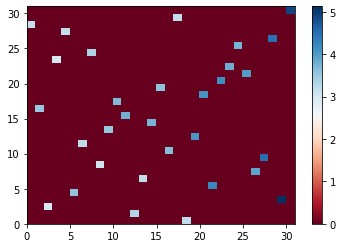

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

## Linear Regression

**We have it in this format Yhat = a + bX**

**Where Y = dependent variable, X = independent variable**

**a is refer as the intercept**
**b is refer to as the slpoe** 

#### Declare the column you want to use as features for Linear Regression

In [91]:
features = ["DayOfWeek"]

#### Specify Prediction targe for Linear Regression

In [92]:
target = ["WeatherDelay"]

#### Let Extract features and targe into separate dataframe

In [93]:
X = df[features]

In [94]:
Y = df[target]

In [95]:
print(X)

         DayOfWeek
0                4
1                4
2                4
3                4
4                4
...            ...
1936753          6
1936754          6
1936755          6
1936756          6
1936757          6

[1936758 rows x 1 columns]


In [96]:
print(Y)

         WeatherDelay
0            3.703571
1            3.703571
2            3.703571
3            0.000000
4            3.703571
...               ...
1936753      0.000000
1936754     57.000000
1936755      0.000000
1936756      3.703571
1936757      3.703571

[1936758 rows x 1 columns]


### Load the data for LinearRegression

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
regressor = LinearRegression()
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Let fit the linear model using DayOfWeek

In [99]:
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Let output a prediction

In [100]:
Yhat = regressor.predict(X)
Yhat[0:5]

array([[3.70416488],
       [3.70416488],
       [3.70416488],
       [3.70416488],
       [3.70416488]])

### What is the value of intercept (a)

In [101]:
regressor.intercept_

array([3.54751944])

### What is the Value of Slope (b)

In [102]:
regressor.coef_

array([[0.03916136]])

### Measurement for Simple Evaluation

#### R_Squared
#### Mean Squared Error

In [103]:
regressor.fit(X,Y)
print("The R-square is: ", regressor.score(X,Y))

The R-square is:  2.0533878462236643e-05


In [104]:
Yhat = regressor.predict(X) 
print("The output of the first five predicted value is :", Yhat[0:5])

The output of the first five predicted value is : [[3.70416488]
 [3.70416488]
 [3.70416488]
 [3.70416488]
 [3.70416488]]


In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
mse = mean_squared_error(df["WeatherDelay"], Yhat)
print(" The mean squared error of WeatherDelay and predicted value is:", mse)

 The mean squared error of WeatherDelay and predicted value is: 297.53756729264234


## Regression Plot

In [107]:
%matplotlib inline
import seaborn as sns

(0, 1419.605564753495)

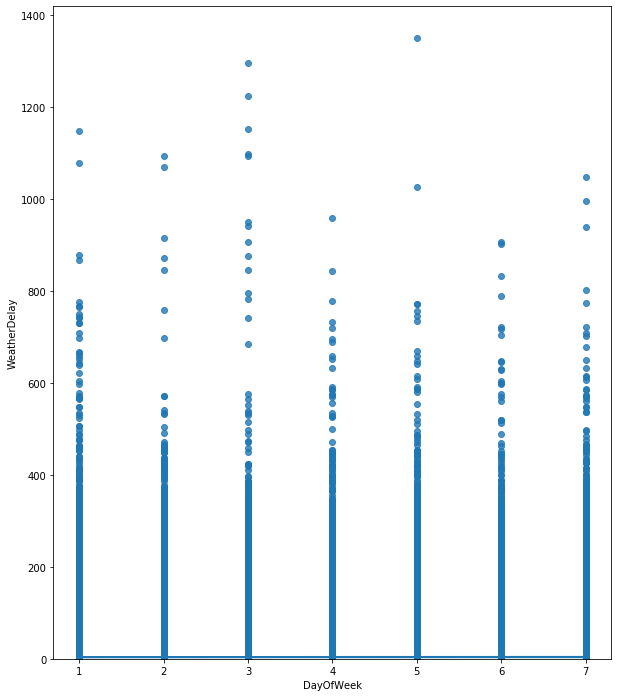

In [108]:
width = 10
height = 12
plt.figure(figsize=(width, height))
sns.regplot(x = "DayOfWeek", y = "WeatherDelay", data = df )
plt.ylim(0,)

(0, 1423.626883551927)

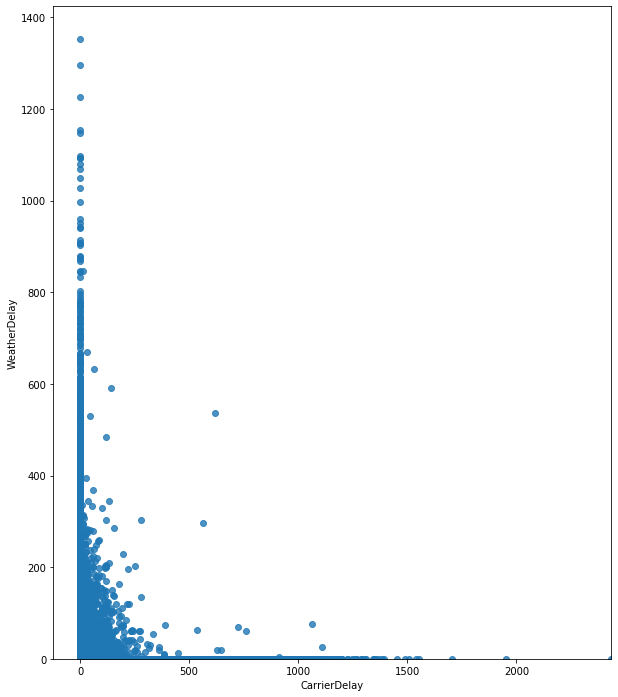

In [109]:
width = 10
height = 12
plt.figure(figsize=(width, height))
sns.regplot(x = "CarrierDelay", y = "WeatherDelay", data = df )
plt.ylim(0,)

### Residual Plot

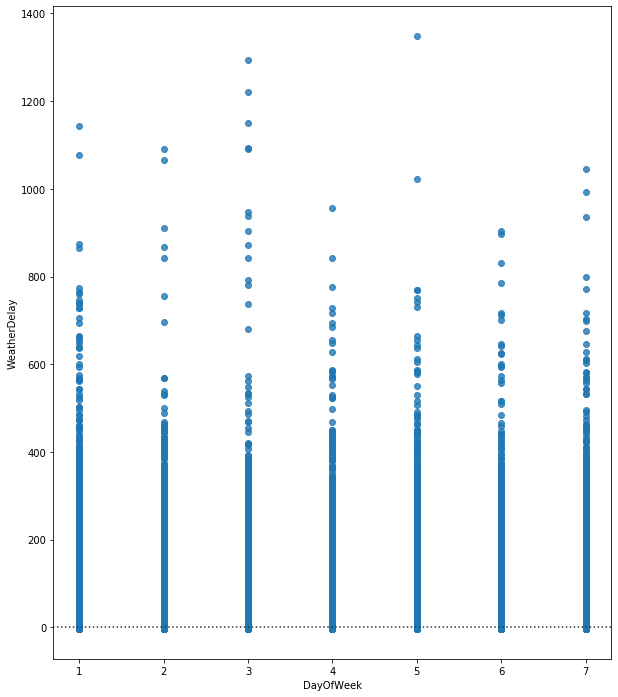

In [110]:
width = 10
height = 12
plt.figure(figsize=(width, height))
sns.residplot(df["DayOfWeek"], df["WeatherDelay"])
plt.show()

### Multiple Linear Regression

#### 𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4

In [111]:
Z = df[["FlightNum","ActualElapsedTime","Diverted","CarrierDelay"]]

In [112]:
regressor.fit(Z, df["WeatherDelay"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What is the intercept of (a)

In [113]:
regressor.intercept_

2.2725996672532816

#### What is the coefficients of (b1,b2,b3,b4)

In [114]:
regressor.coef_

array([ 0.0005955 ,  0.00610522,  0.05290395, -0.0356549 ])

In [115]:
Y_hat = regressor.predict(Z)
Y_hat

array([2.56972156, 4.29430151, 2.44164663, ..., 4.19725692, 3.26689114,
       3.31692387])

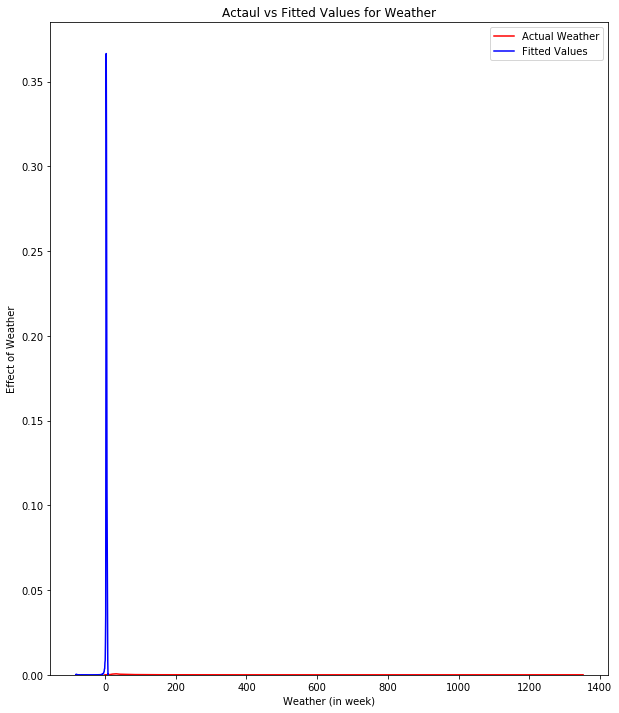

In [116]:
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df["WeatherDelay"], hist = False, color = "r", label = "Actual Weather")
sns.distplot(Y_hat, hist = False, color = "b", label = "Fitted Values", ax=ax1)
plt.title("Actaul vs Fitted Values for Weather")
plt.xlabel("Weather (in week)")
plt.ylabel("Effect of Weather")
plt.show()
plt.close()

In [117]:
regressor.fit(Z, df["WeatherDelay"])
## find R^2
regressor.score(Z, df["WeatherDelay"])

0.008799737037402555

In [118]:
Y_predict_multifit = regressor.predict(Z)

In [119]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['WeatherDelay'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  294.9253709034401


###  Polynomial Regression and Piplines

In [120]:
from sklearn.preprocessing import PolynomialFeatures

In [123]:
# poly_reg = PolynomialFeatures(degree = 3)
# X_poly = poly_reg.fit_transform(X)
# regressor_2 = LinearRegression()
# regressor_2.fit(X_poly, y)

## Visualising Polynomial Regression results 

In [125]:
# plt.scatter(X, y, color = "red")
# plt.plot(X, regressor_2.predict(poly_reg.fit_transform(X)), color = "blue")
# plt.title("Effect of Weather")
# plt.xlabel("Rate of CarriersDelay")
# plt.ylabel("WeatherDelay")
# plt.show()

In [126]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for WeatherDelay ~ Effect')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Effect of WeatherDelay')

    plt.show()
    plt.close()

In [127]:
x = df["CarrierDelay"]
y = df["WeatherDelay"]

### Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function

### Here we use a polynomial of the 3rd order (cubic) 

In [128]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

            3             2
-9.321e-08 x + 0.0001954 x - 0.08194 x + 5.009


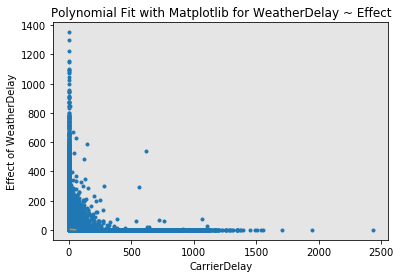

In [129]:
PlotPolly(p, x, y, "CarrierDelay")

In [130]:
np.polyfit(x, y, 3)

array([-9.32060246e-08,  1.95392788e-04, -8.19439173e-02,  5.00864731e+00])

## Polynomial Fit

### Let calculate R^2

In [131]:
from sklearn.metrics import r2_score

In [132]:
r_squared = r2_score(y,p(x))
print("R-squared value is:", r2_score)

R-squared value is: <function r2_score at 0x00000181A88953A8>


## MSE

In [133]:
mean_squared_error(df["WeatherDelay"], p(x))

294.9372928626465